<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | SQL: Trabalhando com Tabelas
Caderno de **Exercícios**<br> 
Professor [Mariane Neiva](https://www.linkedin.com/in/mariane-neiva/)

---

# **Tópicos**

<ol type="1">
  <li>Criação de tabelas;</li>
  <li>Alterando e descartando tabelas;</li>
  <li>Inserindo, atualizando e apagando dados;</li>
</ol>

---

# **Instruções**

Nessa **atividades**, você deve:

 1. Executar a consulta SQL fornecida;
 2. Exportar os resultados em um arquivo csv para sua máquina; 
 3. Renomear o arquivo como **query_\<numero-da-query>.csv**;
 4. Enviar para a avaliação do tutor na plataforma da EBAC.

> **Atenção**: Substitua o **\<numero-da-query>** numero da consulta, exemplo: **query_1.csv**.

**Importante**: Para consultar mais detalhes da AWS Athena [clique aqui](https://docs.aws.amazon.com/athena/latest/ug/what-is.html)

---

# Atividades

# **1. Explorando os dados da tabela de clientes** 

## **1.1. Query 1** 

**IMPORTANTE:** Neste exercício, utilizaremos o mesmo bucket e tabela criadas no módulo 1. 
Portanto, caso não lembre como criar o bucket e criar a tabela no AWS Athena, verifique novamente os vídeos do Módulo 1.


No console do AWS Athena, execute a seguinte query:

```sql
SELECT id, idade, sexo, dependentes FROM clientes;
```

No painel de resultados você deve encontrar o seguinte resultado.

| id        | idade | sexo | dependentes |
|-----------|-------|------|---|
| 768805383 | 45    | M    | 3 | 
| 818770008 | 49    | F    | 5 | 
| 713982108 | 51    | M    | 3 |

<br>

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Você deve envia-lo para os tutores de EBAC.

## **1.2. Query 2** 

No console do AWS Athena, execute a seguinte query:

```sql
SELECT id, valor_transacoes_12m FROM clientes WHERE escolaridade = 'mestrado' and sexo = 'F';
```

No painel de resultados você deve encontrar o seguinte resultado.

| id        | valor_transacoes_12m |
|-----------|--------------------|
| 818770008 |1291.45    |

<br>

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Você deve envia-lo para os tutores de EBAC.

## **1.3. Query 3** 

No console do AWS Athena, execute a seguinte query:

```sql
SELECT sexo, AVG(idade) AS "media_idade_por_sexo" FROM clientes GROUP BY sexo;
```

No painel de resultados você deve encontrar o seguinte resultado.

| sexo | media_idade_por_sexo |
|------|----------------------|
| F    | 49                   |
| M    | 48                   |

<br>

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

# **2. Inserindo novos dados** 

> Na AWS, quando criamos uma tabela externa via < nome_da_pasta_no_bucket > s3, todo novo arquivo que siga o mesmo formato adicionado à < nome_da_pasta_no_bucket > é automaticamente acrescentado à tabela.

## **2.1.Query 4**

Faça o upload de *insercao_dados.csv* fornecido no material auxiliar na mesma pasta onde foi adicionado o arquivo *credito-aula.csv* do módulo passado, volte para o Athena e execute a seguinte query: 

```sql
SELECT * FROM clientes;
```

No painel de resultados você deve encontrar o seguinte resultado.

|id|	idade|	sexo|	dependentes|	escolaridade	|tipo_cartao|	limite_credito|	valor_transacoes_12m|	qtd_transacoes_12m|
|---|-----|---|----|----|----|-----|-----|----|
|768805383|	45|	M	|3|	ensino medio	|blue	|12691.51|	1144.9	|42|
|	818770008|	49|	F	|5|	mestrado	| solteiro	|8256.96|	1291.45|	33|
|	713982108|	51|	M|	3	|mestrado	| casado	|3418.56	|1887.72	|20|
|	768805451	|56	|M|	6	|ensino medio	|casado|	7591.51	|1564.9	|50 |
|	456556|	30|	F	|0|	mestrado	|solteiro	|5526.96|	55251.45	|10|
|	545	|49|	F	|2|	doutorado|	blue|	3417.55|	555.72	|7|

<br>

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.


# **3. Criando e trabalhando com partições** 

Como dito anteriormente, o AWS é um serviço que envolve custos.
Para prevenir maiores cobranças, os usuários do sistema particionam os dados em tabelas menores para processa-los.

Por isso, vamos aprender como carregar as partições no S3 e criar a tabela particionada 

## 3.1. Query 5 

* Crie uma nova pasta no bucket com nome bucket-<seunome>-partitioned. 
* Dentro de  bucket-<seunome>-partitioned crie duas pastas: sexo=F e sexo=M.
*   Dentro da pasta  bucket-< seunome >-partitioned/sexo=F coloque o arquivo disponível no material de aula: **sexo=F.csv**
*   Dentro da pasta  bucket-< seunome >-partitioned/sexo=M coloque o arquivo disponível no material de aula: **sexo=M.csv**

Volte para o Athena e execute a seguinte query:

```sql
CREATE EXTERNAL TABLE clientes_part(
  id BIGINT, 
  idade BIGINT, 
  dependentes BIGINT, 
  escolaridade STRING, 
  tipo_cartao STRING, 
  limite_credito DOUBLE, 
  valor_transacoes_12m DOUBLE, 
  qtd_transacoes_12m BIGINT) 
  PARTITIONED BY (sexo string)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.OpenCSVSerde'
WITH SERDEPROPERTIES ('separatorChar' = ',', 'quoteChar' = '"', 'escapeChar' = '\\')
STORED AS TEXTFILE
LOCATION 's3://bucket-<seunome>-partitioned/'
```

**Importante:** substituia < seu nome > pelo seu primeiro nome. No meu caso, utilizei 's3://bucket-mari-partitioned/'

Depois da mensagem de *Query sucessful*, carregue as partições com o comando:

```sql
MSCK REPAIR TABLE clientes_part;
```
Para verificar e entregar o exercício, execute a query:

```sql
select * from clientes_part where sexo = 'F';
```
> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

No painel de resultados você deve encontrar o seguinte resultado:


|	id	|idade|	dependentes	|escolaridade|	tipo_cartao	|limite_credito	|valor_transacoes_12m	|qtd_transacoes_12m	|sexo|
|---|-|-|-|-|-|-|-|-|
| 456556|	30|	0|	mestrado|	solteiro|	5526.96|	55251.45	|10|	F|
|	545	|49|	2|	doutorado|	blue	|3417.55|	555.72	|7|	F|
|	818770008	|49|	5 |	mestrado|	solteiro|		8256.96|	1291.45|	33|	F|



## 3.2. Query 6

Você também pode utilizar outras funções de seleção nas partições:

```sql
SELECT id, idade, limite_credito FROM clientes_part WHERE sexo = 'M' ORDER BY limite_credito DESC;
```

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

No painel de resultados você deve encontrar o seguinte resultado:



|id	| idade	| limite_credito |
|-|-|-|
|	768805383|	45	|12691.51|
|768805451	|56	|7591.51|
	|713982108	|51	|3418.56|

# **4. Adicionando colunas**

## 4.1. Query 7
Como vimos na aula, vamos utilizar o método ALTER TABLE também na prática para adicionar uma coluna. 


Execute o seguinte comando:

```sql
ALTER TABLE clientes ADD COLUMNS (estado string)
```

Verifique a adicão da nova coluna e envie o resultado da Query 7:

```sql
SELECT * from clientes
```
O resultado deve ser (caso os itens não estejam exatamente na mesma ordem, não se preocupe. Verifique se todas 6 as linhas estão sendo exibidas):

|id|idade|sexo|dependentes|escolaridade|tipo_cartao|limite_credito|valor_transacoes_12m	|qtd_transacoes_12m |estado| 
|-|-|-|-|-|-|-|-|-|-| 
|768805451	|56|	M|	6|	ensino medio|	casado	|7591.51	|1564.90|	50| |	
|456556|	30|	F	|0	 |mestrado	|solteiro	|5526.96|	55251.45	|10	| |
|	545|	49|	F|	2|	doutorado|	blue	|3417.55|	555.72|	7|	|
|	768805383	|45	|M |	3|	ensino medio	|blue|	12691.51|	1144.90|	42|	|
|818770008	|49	|F|	5	|mestrado	| solteiro|	8256.96|	1291.45|	33|	|
|	713982108	|51|	M	|3|	mestrado |	casado|	3418.56|	1887.72|	20| |

# **5. Deletando tabelas**


Nossa última atividade é a deleção da tabela clientes. Para tal, utilize o comando na AWS Athena.

```sql
DROP TABLE clientes 
```

> **Atenção:** não há necessidade de entrega  

Abaixo todas as query feitas nessa tarefa !

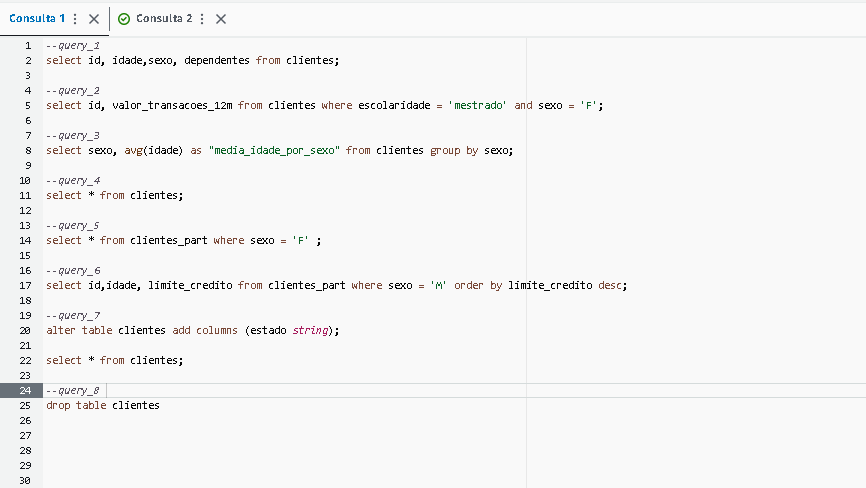